Our aim in this project is to find mobile app profiles that are profitable for the Google Play market. We're working as data analysts for a company that builds Android mobile apps, and our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build.

At our company, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import random
from pylab import rcParams
import seaborn as sns 
sns.set()

In [2]:
android = pd.read_csv("C:/Users/Asus/OneDrive/Máy tính/Top App Analysis/App Dataset/googleplaystore.csv")
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
android.shape

(10841, 13)

In [4]:
android.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

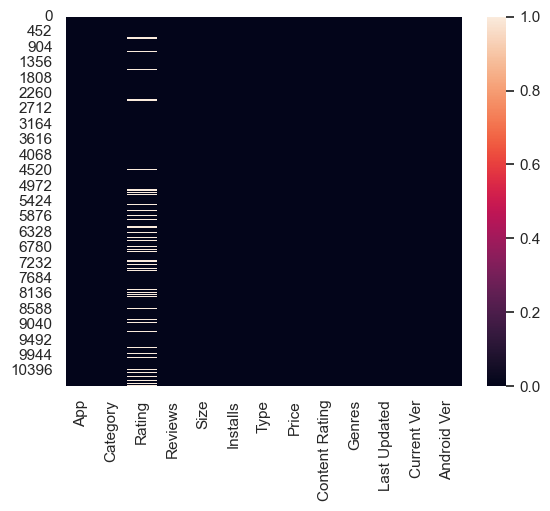

In [5]:
sns.heatmap(android.isnull())
plt.show()

In [6]:
total = android.isnull().sum().sort_values(ascending = False)
percent = (android.isnull().sum() / android.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


In [7]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
android.dropna(how = "any", inplace = True)

In [9]:
total = android.isnull().sum().sort_values(ascending = False)
percent = (android.isnull().sum() / android.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


# Rating

In [10]:
android['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

## Rating distribution 

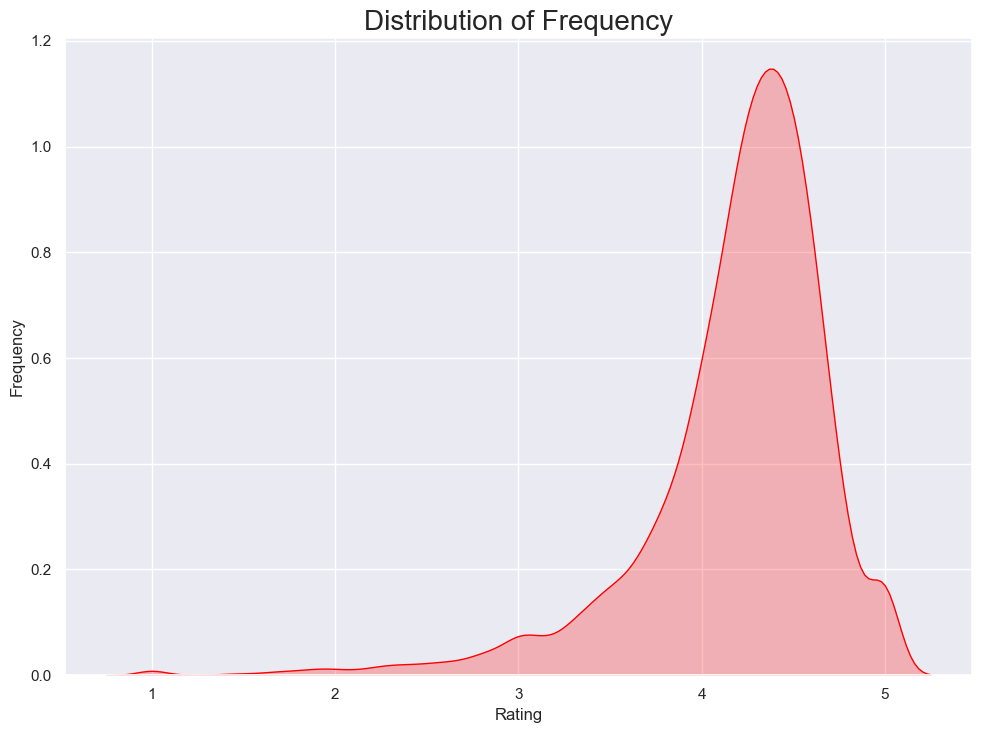

In [11]:
rcParams["figure.figsize"] = 11.7,8.27
g = sns.kdeplot(android.Rating, color = "red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title("Distribution of Frequency", size = 20)
plt.show()

As you can see that average rating of application in store is around 4 which is very high

# Category

In [12]:
print(len(android["Category"].unique()),"categories")
print("\n", android["Category"].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


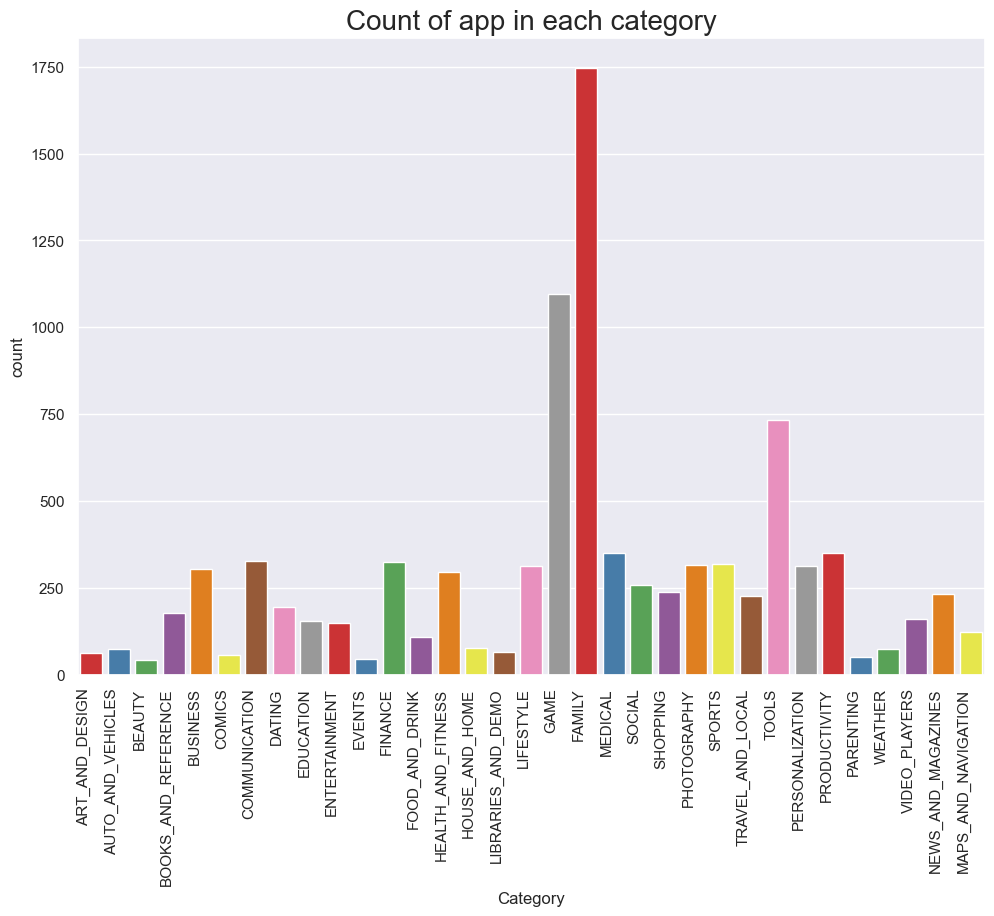

In [13]:
g = sns.countplot(x = "Category", data = android, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation = 90, ha = "right")
plt.title("Count of app in each category", size = 20)
plt.show()

As you can see that Game and Family category are the most appearances for application in store

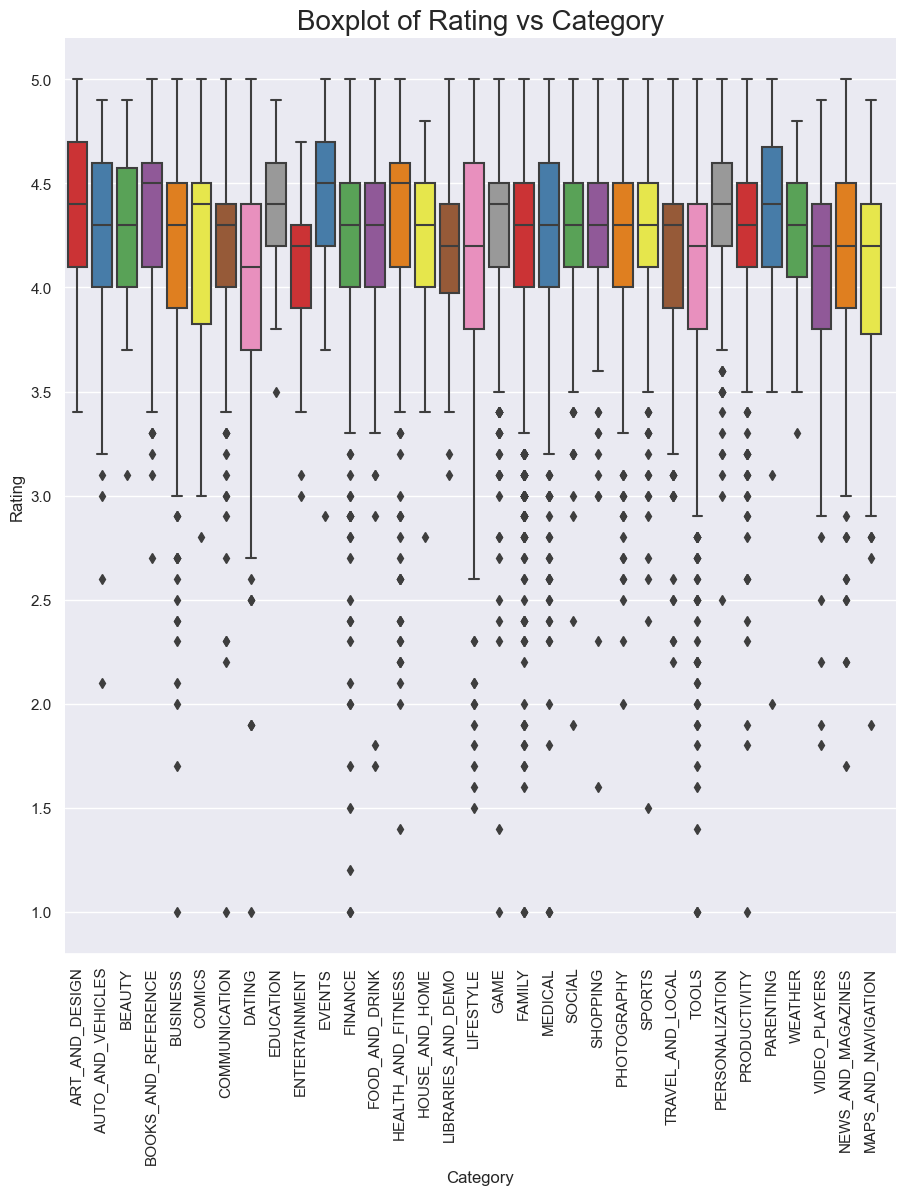

In [14]:
g = sns.catplot(x = "Category", y = "Rating", data = android, kind = "box", height = 10, palette = "Set1")
g.despine(left = True)
g.set_xticklabels(rotation = 90)
g.set(xticks = range(0,34))
g = g.set_ylabels("Rating")
plt.title("Boxplot of Rating vs Category", size = 20)
plt.show()

As you can see that rating of application in each category is not different too much 

# Reviews

In [15]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
android["Reviews"].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

As you can see that data is still in object type, we neeed to convert into int

In [17]:
android["Reviews"] = android["Reviews"].astype(int)

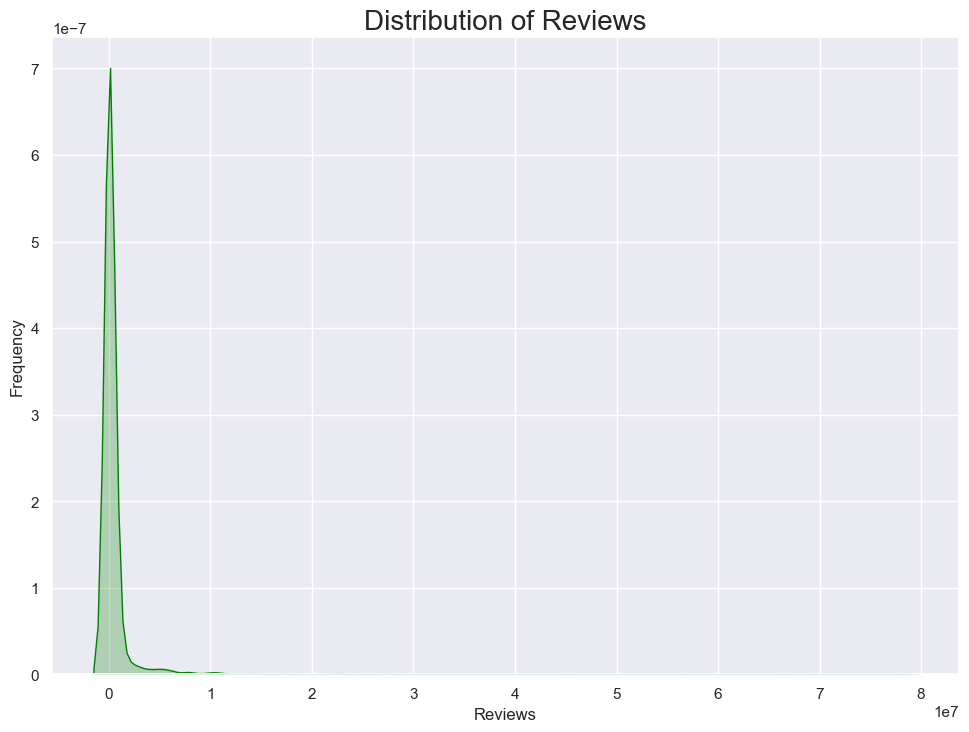

In [18]:
rcParams["figure.figsize"] = 11.7,8.27
g = sns.kdeplot(android.Reviews, color = "green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title("Distribution of Reviews", size = 20)
plt.show()

In [19]:
android[android["Reviews"] > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


As you can see that most of application in this store have less than 1M in reviews.
Obviously, well-known applications have a lot of reviews.

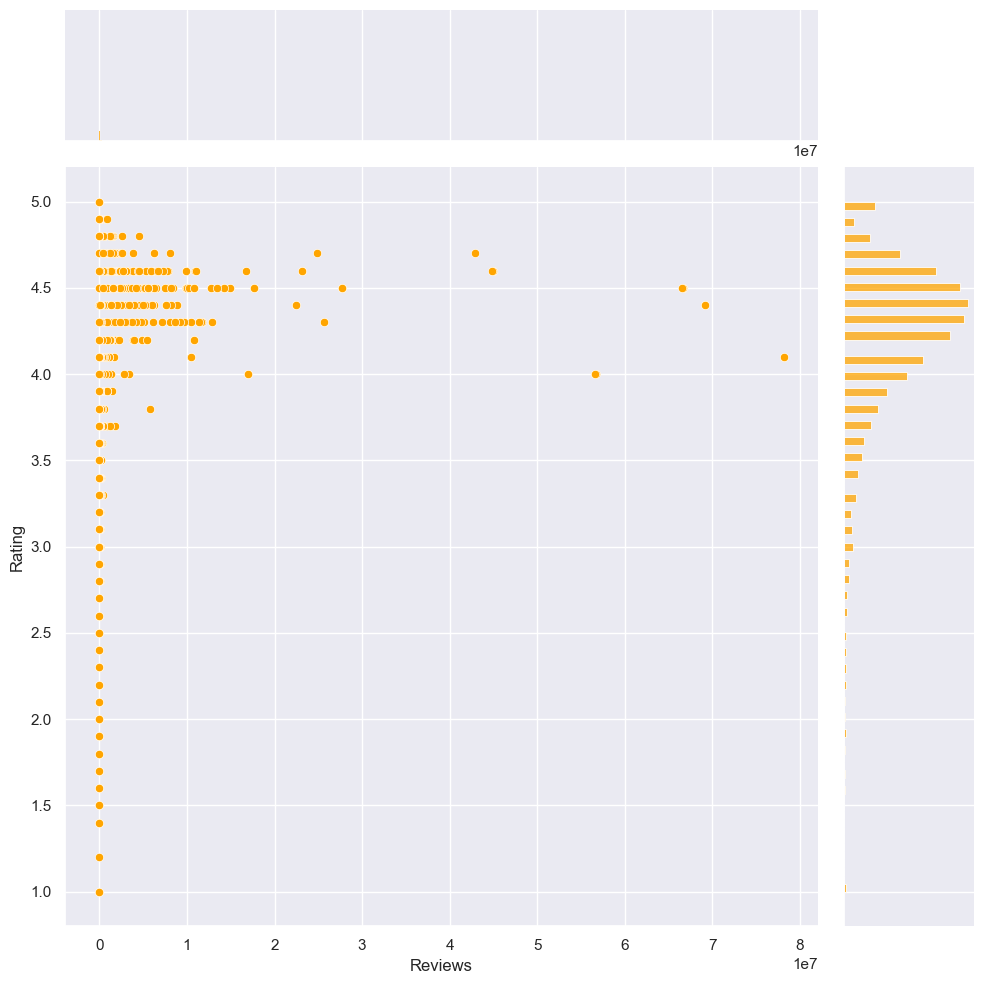

In [20]:
rcParams["figure.figsize"] = 10,10
g = sns.jointplot(x = "Reviews", y = "Rating", color = "orange", data = android, size = 10)
plt.show()

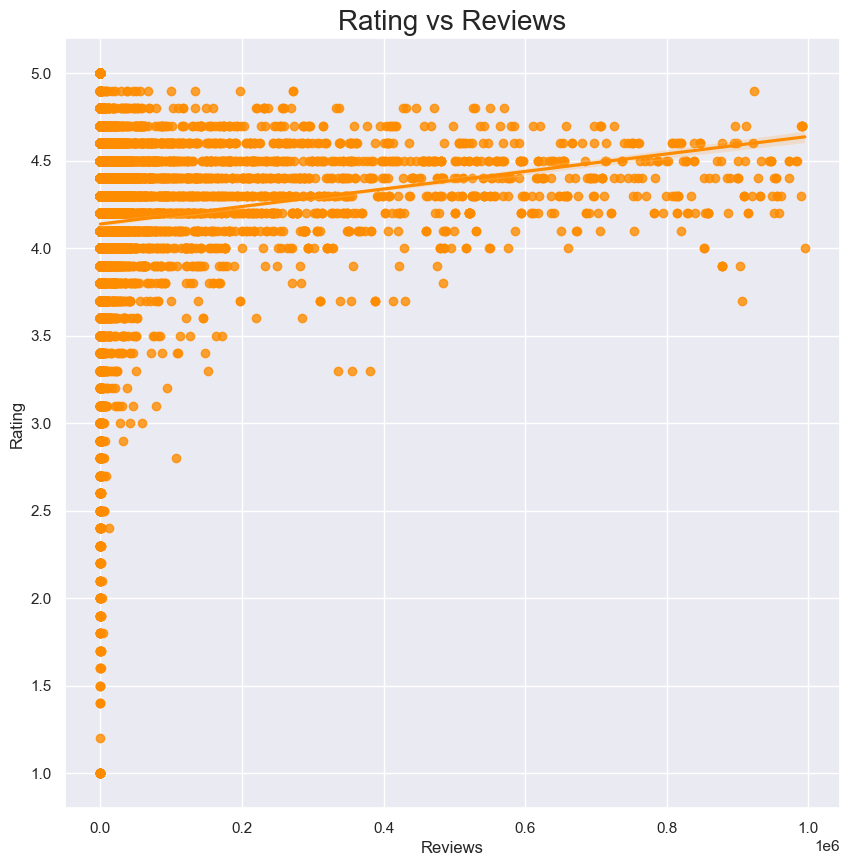

In [21]:
plt.figure(figsize = (10,10))
g = sns.regplot(x = "Reviews", y = "Rating", color = "darkorange", data = android[android["Reviews"] < 1000000])
plt.title("Rating vs Reviews", size = 20)
plt.show()

It seems like well-known application will get a good rating

# Size

In [22]:
android['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

Data still in object type, and contains the metric symbol for the prefix, and special size which are
"Varies with device" that we need to deal with it.

In [23]:
len(android.Size == "Varies with device")

9360

In [24]:
# Change it ti NA first
android.Size.replace("Varies with device", np.nan, inplace = True)

In [25]:
android.Size = (android.Size.replace(r'[kM]+$','', regex = True).astype(float)* \
    android.Size.str.extract(r'[\d\.]+([kM]+)', expand = False).fillna(1).replace(['k','M'],
           [10**3,10**6]).astype(int))

In [26]:
android.Size.fillna(android.groupby("Category")["Size"].transform("mean"), inplace = True)

I decide to fill "Varies with device" with mean of size in each category

<Figure size 1000x1000 with 0 Axes>

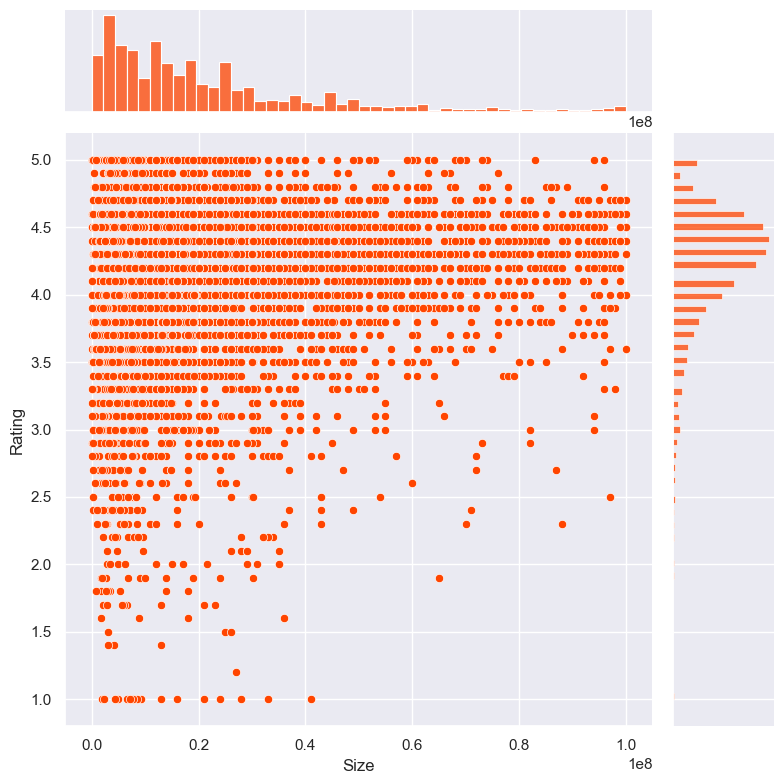

In [27]:
plt.figure(figsize=(10,10))
g = sns.jointplot(x = "Size", y = "Rating", color = "orangered", data = android, size = 8)
plt.show()

### **Installs**

In [28]:
android["Installs"].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

I encode it by order of size;
ex: 0 refer to 1+
    1 refer to 5+
    2 refer to 10+
    -
    -
    -

In [29]:
android["Installs"] = android["Installs"].apply(lambda x: x.replace(",",""))
android["Installs"] = android["Installs"].apply(lambda x: x.replace("+",""))
android["Installs"] = android["Installs"].apply(lambda x: int(x))

In [30]:
android["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [31]:
Sorted_value = sorted(list(android["Installs"].unique()))

In [32]:
android["Installs"].replace(Sorted_value, range(0,len(Sorted_value),1), inplace = True)

In [33]:
android["Installs"].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

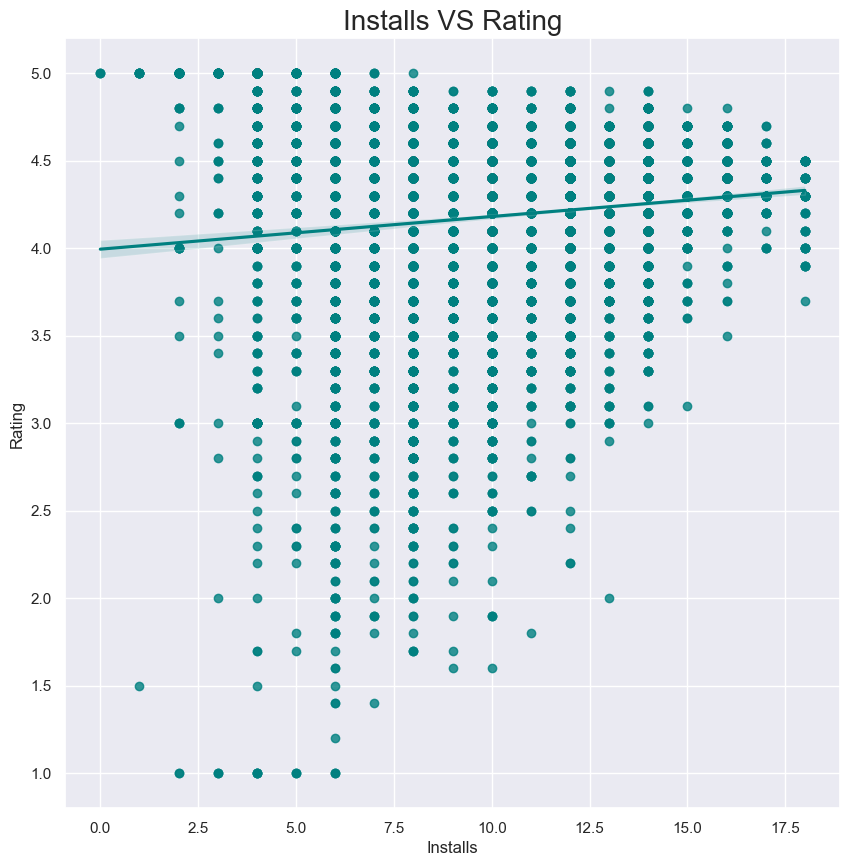

In [34]:
plt.figure(figsize=(10,10))
sns.regplot(x = "Installs", y = "Rating", color = "teal", data = android)
plt.title("Installs VS Rating", size = 20)
plt.show()

Seem like number of install affect to rating

# Type

In [35]:
android["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [36]:
labels = android["Type"].value_counts(sort = True).index
sizes = android["Type"].value_counts(sort = True)

In [37]:
labels

Index(['Free', 'Paid'], dtype='object')

In [38]:
sizes

Free    8715
Paid     645
Name: Type, dtype: int64

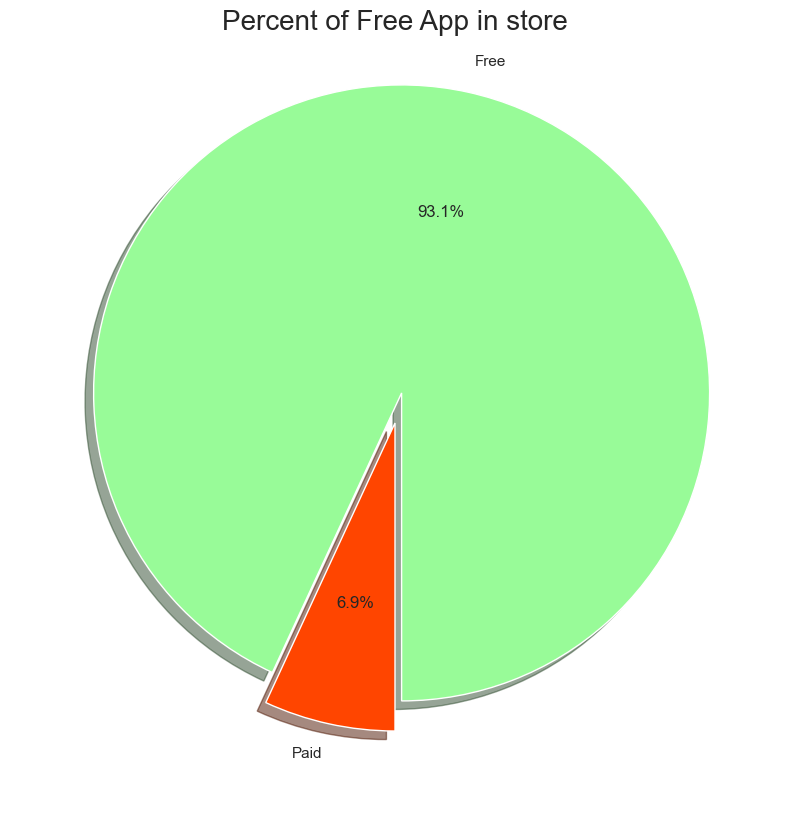

In [39]:
colors = ["palegreen", "orangered"]
explode = (0.1,0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 270)
plt.title("Percent of Free App in store", size = 20)
plt.show()

Most of application in this store are free (93.1%)

Because string can't enter to model, I need to change format a little bit

In [40]:
android["Free"] = android["Type"].map(lambda x: 1 if x == 'Free' else 0)
android.drop(["Type"],axis = 1, inplace = True)

# Price

In [41]:
android["Price"].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [42]:
android["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Data is in object type, in format of dollar sign

In [43]:
android["Price"].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [44]:
android["Price"] = android["Price"].apply(lambda x: x.replace("$",""))
android["Price"] = android["Price"].apply(lambda x: float(x))


In [45]:
android["Price"].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Average is price is around 0.96, but most of them are free (8715 from 9360).
The most expensive app is 400 dollar !!!.

In [46]:
android[android["Price"] == 400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


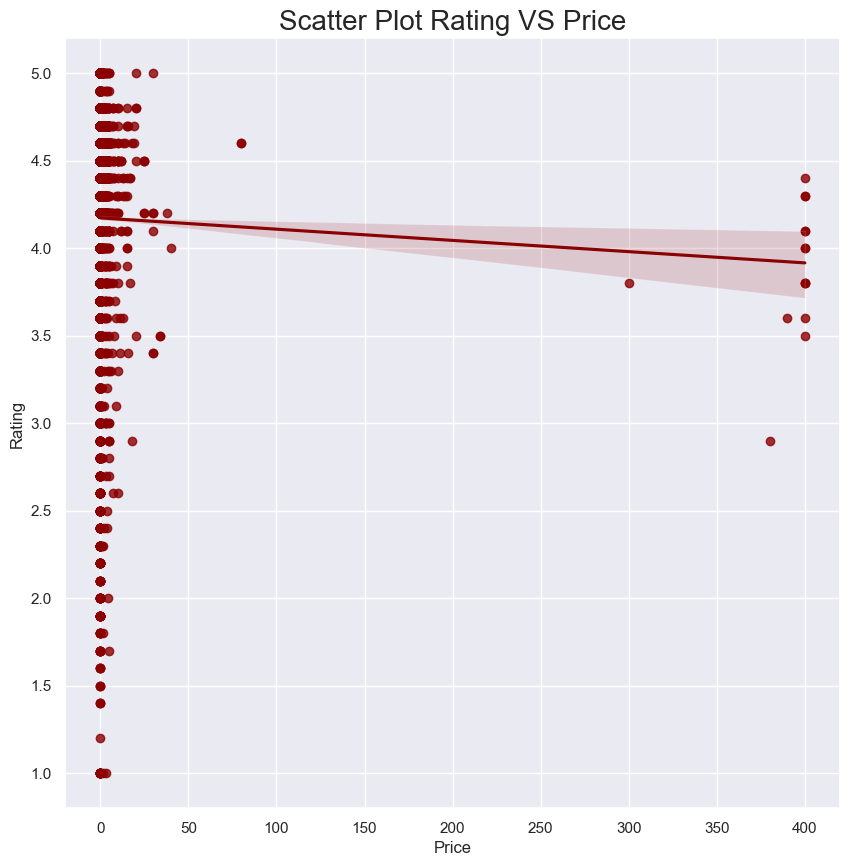

In [47]:
plt.figure(figsize = (10,10))
sns.regplot(x = "Price", y = "Rating", color = "darkred", data = android[android['Reviews'] < 1000000])
plt.title("Scatter Plot Rating VS Price", size = 20)
plt.show()

Higher price application may make customer disappointed, if they are not good enough

Try to viusalize in type of band, it may easier to understand

In [48]:
android.loc[android["Price"] == 0, "PriceBand"] = "0 Free"
android.loc[(android["Price"] > 0) & (android["Price"] <= 0.99), "PriceBand"] = "1 cheap"
android.loc[(android["Price"] > 0.99) & (android["Price"] <= 2.99), "PriceBand"] = "2 not cheap"
android.loc[(android["Price"] > 2.99) & (android["Price"] <= 4.99), "PriceBand"] = "3 normal"
android.loc[(android["Price"] > 4.99) & (android["Price"] <= 14.99), "PriceBand"] = "4 expensive"
android.loc[(android["Price"] > 14.99) & (android["Price"] <= 29.99), "PriceBand"] = "5 too expensive"
android.loc[(android["Price"] > 29.99, "PriceBand")] = "6 FXXXXX expensive"


In [49]:
android[["PriceBand", "Rating"]].groupby(["PriceBand"], as_index = False).mean()

,PriceBand,Rating
0,0 Free,4.186288
1,1 cheap,4.300943
2,2 not cheap,4.292975
3,3 normal,4.250318
4,4 expensive,4.269149
5,5 too expensive,4.252000
6,6 FXXXXX expensive,3.923810


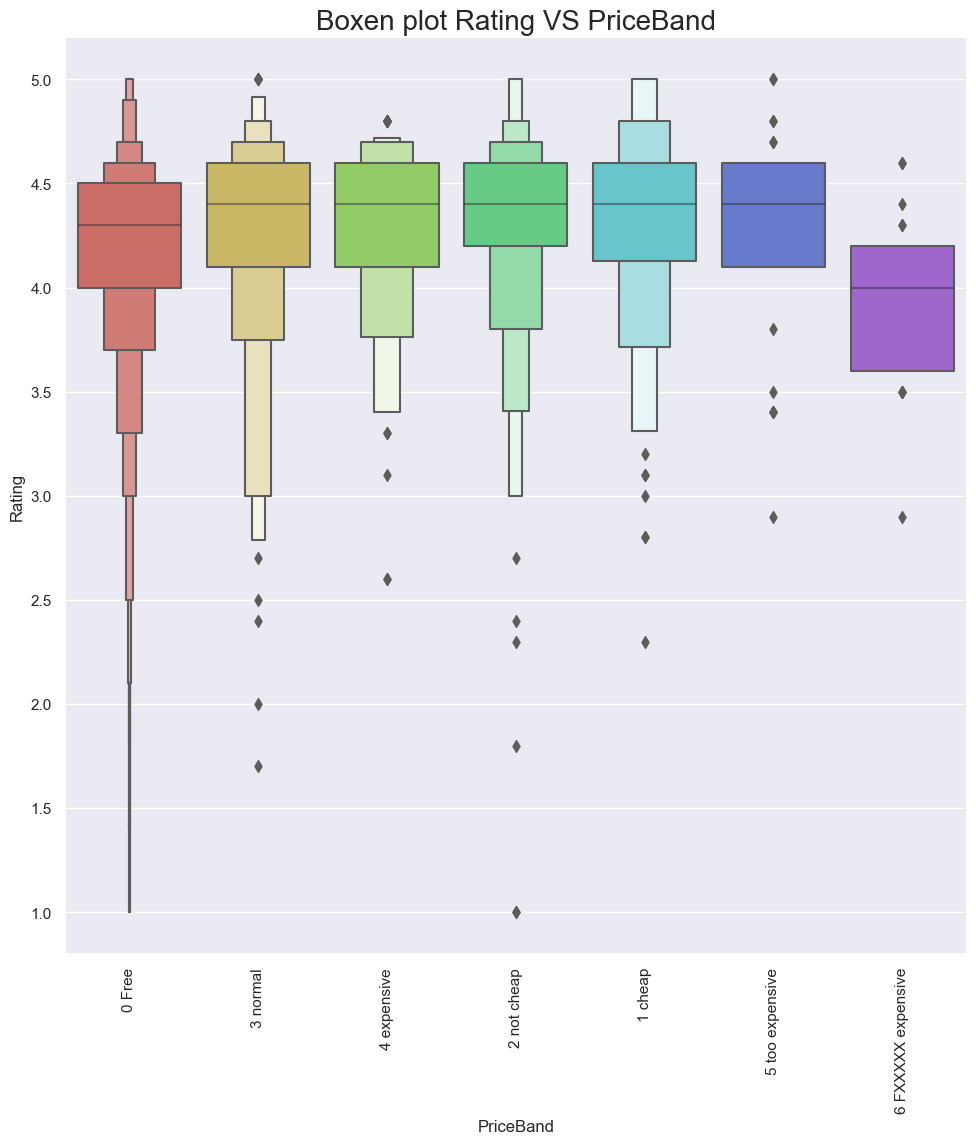

In [50]:
co = sns.color_palette("hls",8)
g = sns.catplot(x = "PriceBand", y = "Rating", data = android, height = 10, kind = "boxen", palette = co)
g.despine(left = False)
g.set_xticklabels(rotation = 90)
g = g.set_ylabels("Rating")
plt.title("Boxen plot Rating VS PriceBand", size = 20)
plt.show()

Price are not effect to rating, but if it is very expensive, it might be low rating 

In [51]:
def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x : random.randint(0,255), range(3)))
    return color

In [52]:
# create palette for categories

flatui = []
for i in range(0,len(android["Category"].unique()),1):
    flatui.append(generate_color())

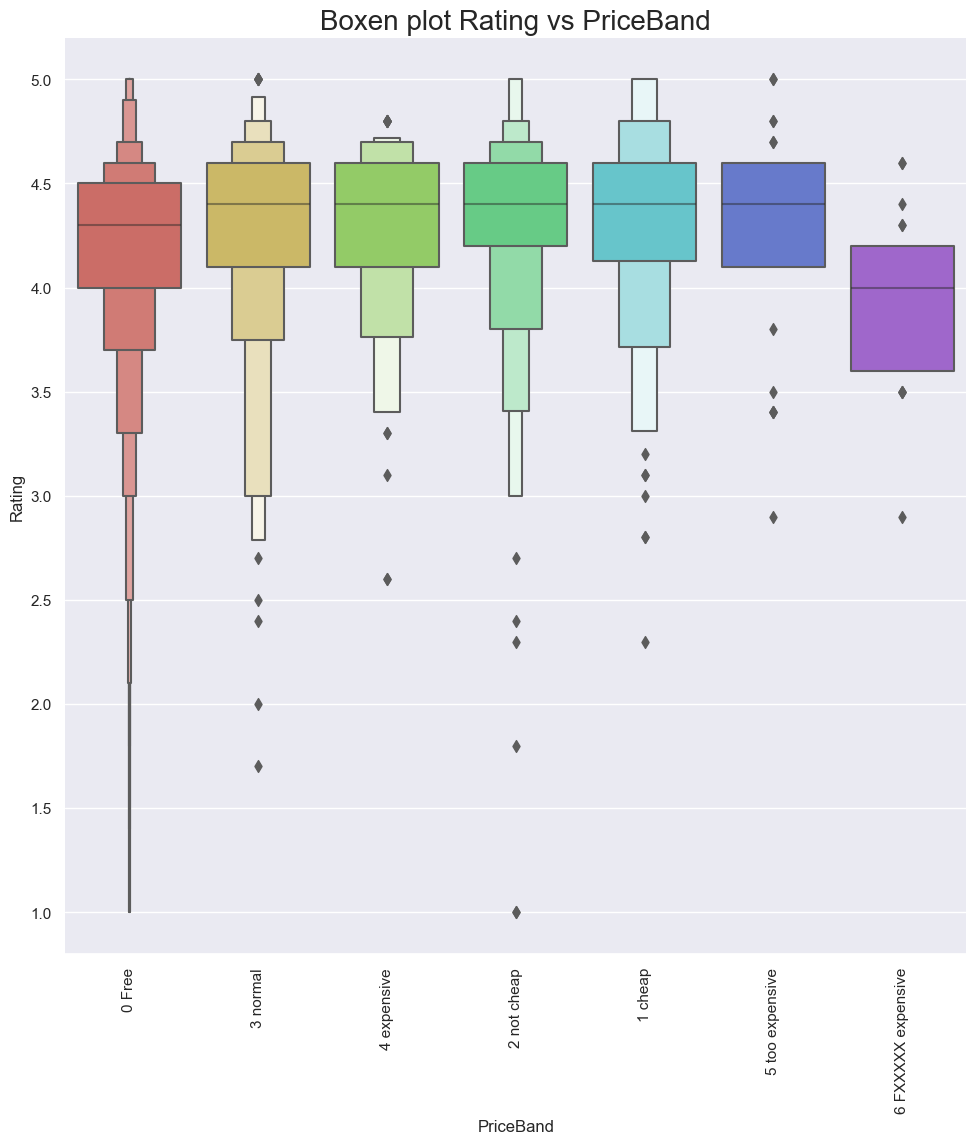

In [54]:
co = sns.color_palette("hls", 8)
g = sns.catplot(x = "PriceBand", y = "Rating", data = android, kind = "boxen", 
                height = 10, palette = co)
g.despine(left = True)
g.set_xticklabels(rotation = 90)
g = g.set_ylabels("Rating")
plt.title("Boxen plot Rating vs PriceBand",size = 20)
plt.show()

# Content Rating

In [55]:
android["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

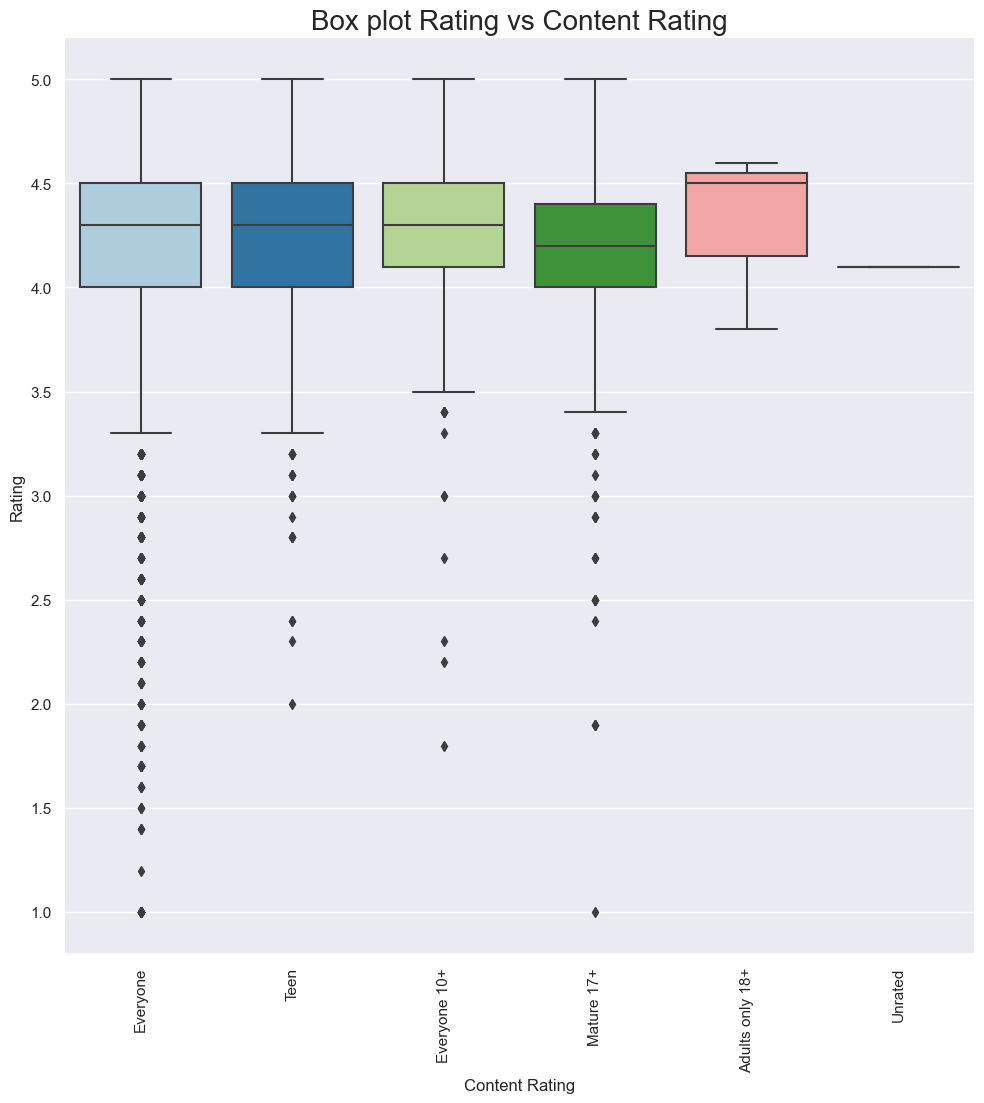

In [56]:
g = sns.catplot(x = "Content Rating", y = "Rating", data = android, kind = "box", height = 10,
                palette = "Paired")
g.despine(left = True)
g.set_xticklabels(rotation = 90)
g = g.set_ylabels("Rating")
plt.title("Box plot Rating vs Content Rating", size = 20)
plt.show()

As you can see that Content Rating not effect too much to rating, but in Mature applications, look 
like they get lower rting than other.

In [57]:
android[android["Content Rating"] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 Free


In [58]:
android = android[android['Content Rating'] != 'Unrated']

I decide to drop 'Unrated' rating because it contain only 1 record

# Genre

In [59]:
print(len(android["Genres"].unique()), "gneres")
print('\n', android["Genres"].unique())

115 gneres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

In [60]:
android.Genres.value_counts().head(10)

Tools            731
Entertainment    533
Education        468
Action           358
Productivity     351
Medical          350
Sports           333
Communication    328
Finance          323
Photography      317
Name: Genres, dtype: int64

In [61]:
android.Genres.value_counts().tail(10)

Health & Fitness;Action & Adventure    1
Health & Fitness;Education             1
Travel & Local;Action & Adventure      1
Board;Pretend Play                     1
Lifestyle;Pretend Play                 1
Parenting;Brain Games                  1
Card;Brain Games                       1
Tools;Education                        1
Entertainment;Education                1
Strategy;Creativity                    1
Name: Genres, dtype: int64

Many genre contain only few record, it may make a bias. Then, I decide to group it to bigger by
ignore sub-genre (after ';' sign)

In [62]:
android["Genres"] = android["Genres"].str.split(';').str[0]

In [63]:
print(len(android['Genres'].unique()), "genres")
print("\n", android["Genres"].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [64]:
android.Genres.value_counts().tail(10)

Comics           58
Parenting        50
Card             48
Events           45
Beauty           42
Casino           37
Trivia           28
Word             28
Music            24
Music & Audio     1
Name: Genres, dtype: int64

Group Music & Audio as Music

In [65]:
android.Genres.replace("Group Music & Audio as Music", "Music", inplace = True)

In [66]:
android[["Genres", "Rating"]].groupby(["Genres"],as_index = False).mean().describe()

,Rating
count,48.000000
mean,4.212485
std,0.104074
min,3.970769
25%,4.132114
50%,4.204821
75%,4.286532
max,4.435556


In [67]:
android[["Genres","Rating"]].groupby(["Genres"], as_index = False).mean().sort_values("Rating").head(1)

,Genres,Rating
14,Dating,3.970769


In [68]:
android[["Genres","Rating"]].groupby(["Genres"], as_index = False).mean().sort_values("Rating").tail(1)

,Genres,Rating
18,Events,4.435556


Observing from Standard Deviation, seem like genre is not effect too  much to rating. The lowest
of an average rating on genres (Dating) is 3.97 while the highest (Events) is 4.43 .

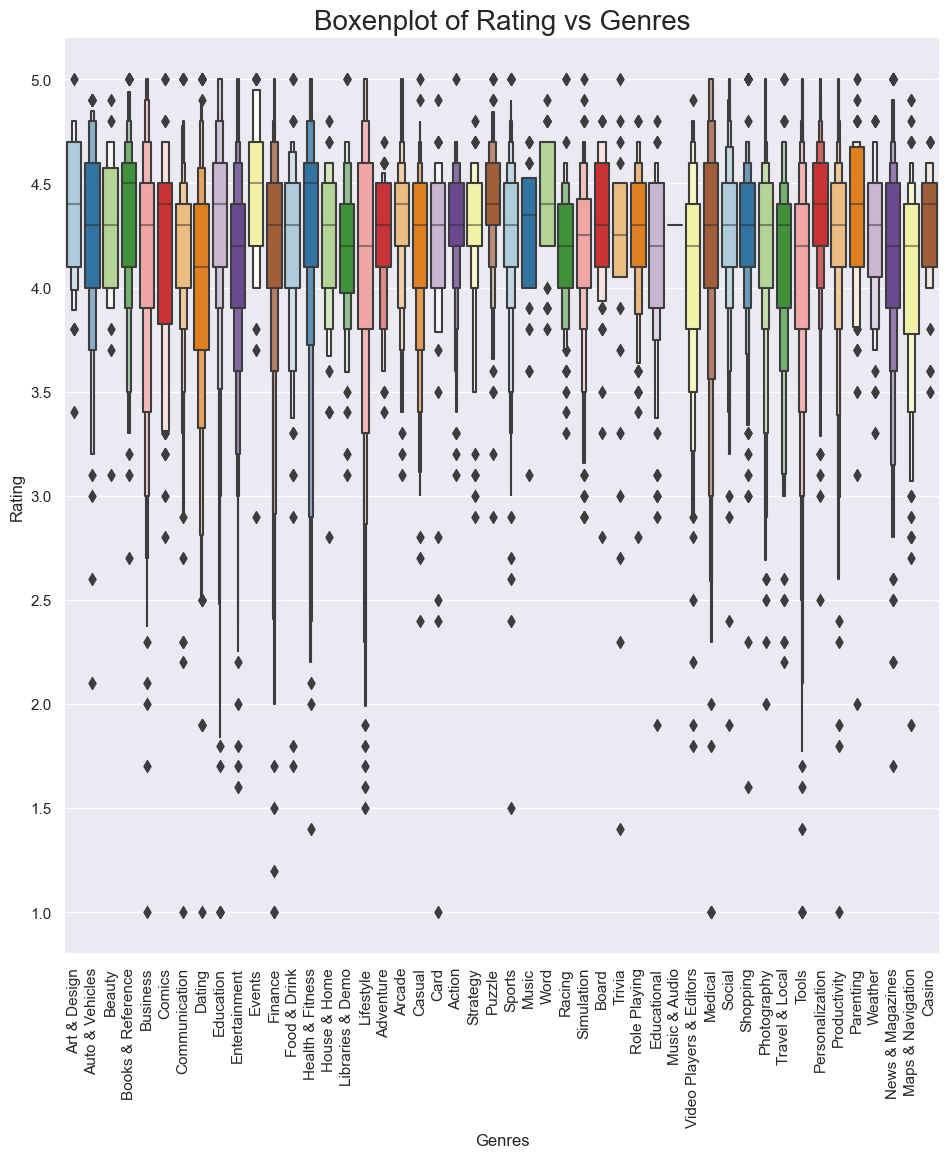

In [69]:
g = sns.catplot(x = "Genres", y = "Rating", data = android, kind = "boxen", height = 10, 
                palette = "Paired" )
g.despine(left = True)
g.set_xticklabels(rotation = 90)
g = g.set_ylabels("Rating")
plt.title("Boxenplot of Rating vs Genres", size = 20)
plt.show()

# Last Updated

In [70]:
android["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

"Last Updated" feature still in String format, we need to change it in someway for plot or 
put it in model.

I decide to change it to 'dataframe' format but it still can't use in raw, I create new feature which called "lastupdate' , will contain how long is this app got update in last time (... days 
ago). I assume that today is the day which the latest Update of application in this dataset (2018 -08-08)

In [71]:
android["new"] = pd.to_datetime(android["Last Updated"])
android["new"].describe()

count                    9359
unique                   1298
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

In [72]:
android["new"].max()

Timestamp('2018-08-08 00:00:00')

In [73]:
android["new"][0] - android['new'].max()

Timedelta('-213 days +00:00:00')

In [74]:
android["lastupdate"] = (android["new"] - android["new"].max()).dt.days
android["lastupdate"].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

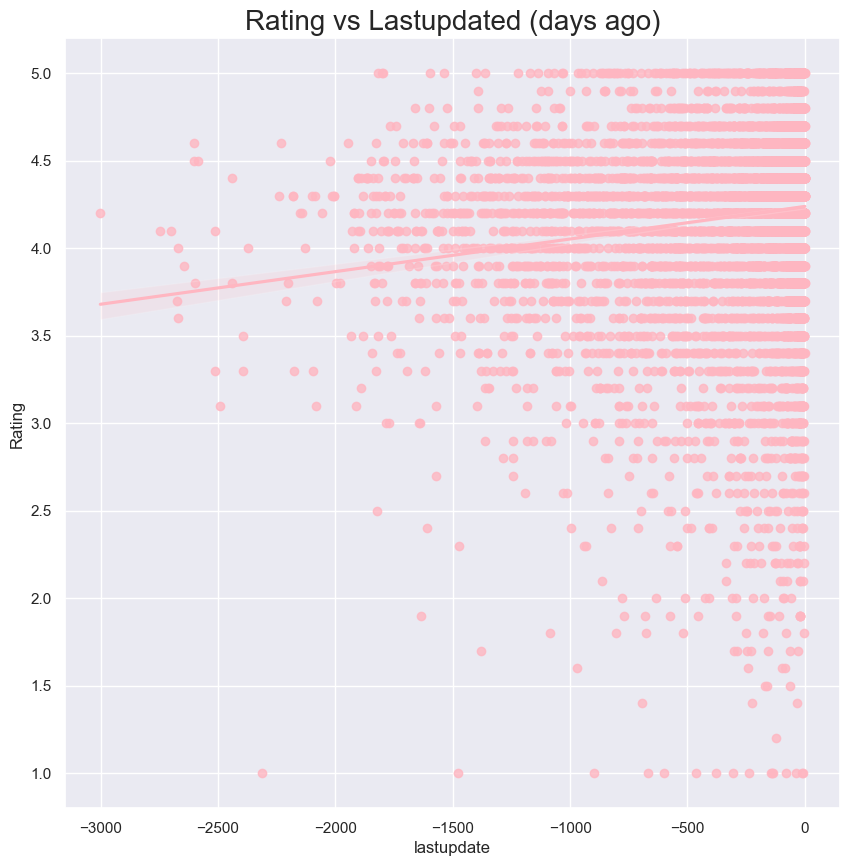

In [75]:
plt.figure(figsize = (10,10))
sns.regplot(x = "lastupdate", y = "Rating", color = 'lightpink', 
            data = android)
plt.title("Rating vs Lastupdated (days ago)", size = 20)
plt.show()

In [76]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand,new,lastupdate
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0 Free,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up,1,0 Free,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0 Free,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0 Free,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Everyone,Art & Design,"June 20, 2018",1.1,4.4 and up,1,0 Free,2018-06-20,-49
